출처 : https://www.kaggle.com/arthurtok/tsne-pca-quick-and-dirty-visuals

# INTRODUCTION

이 노트북은 간단하고 빠르게 두 가지 널리 쓰이는 차원 축소 기법인 PCA와 t-SNE를 보여줍니다. 

In [2]:
# Import our relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

데이터를 데이터프레임으로 로드합니다. 

In [3]:
data = pd.read_csv('./datasets/cancer/cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


간단하게 데이터를 보면 우리는 몇 가지 사실을 발견할 수 있습니다. 우리 타겟 열인 **diagnosis**는 수치형 포맷이 아닙니다. 따라서 수치형 포맷으로 바꿔줘야합니다. 그리고 결측값을 제거해야합니다. ID 는 결과와 상관없는 열이므로 삭제합니다. 

In [4]:
# Drop the id column
data = data.drop('id', axis=1)
# Convert the diagnosis column to numeric format
data['diagnosis'] = data['diagnosis'].factorize()[0]
# Fill all Null values with zero
data = data.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = data['diagnosis']
data = data.drop('diagnosis', axis=1)

# PCA와 t-SNE 시각화 비교 

PCA와 t-SNE 시각화를 비교해보겠습니다. 

In [5]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [6]:
# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

C:\Users\Administrator\anaconda3\envs\Hands-On-MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\Hands-On-MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 38.912067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.764069
[t-SNE] KL divergence after 2000 iterations: 0.209304


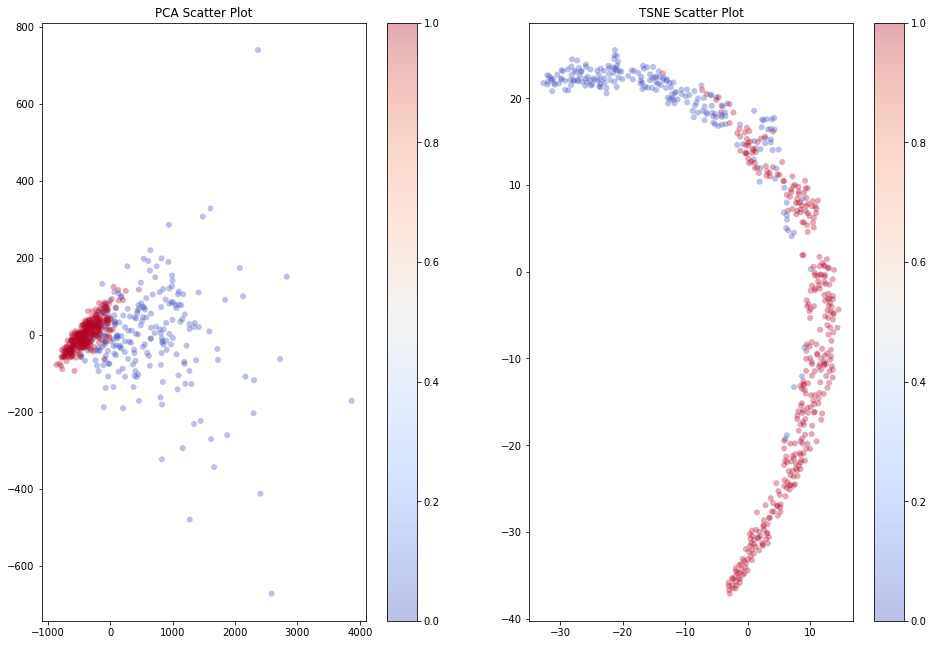

In [7]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

이 그림에서 알 수 있듯이, PCA가 꽤 잘 작동하는 듯 보이지만, t-SNE가 더 명확한 경계를 그리고 있다는 것을 알 수 있습니다. 
즉 이 데이터셋은 non-linear한 특성을 가지고 있다고 판단할 수 있습니다. 

# 표준화와 시각화

표준화를 해보고 결과가 더욱 명확해지는지 확인해봅시다. 

In [8]:
# Calling Sklearn scaling method
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [9]:
# Invoke the PCA method on the standardised data
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(X_std)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results_std = tsne.fit_transform(X_std)

C:\Users\Administrator\anaconda3\envs\Hands-On-MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\Hands-On-MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.501236
[t-SNE] KL divergence after 1300 iterations: 0.914441


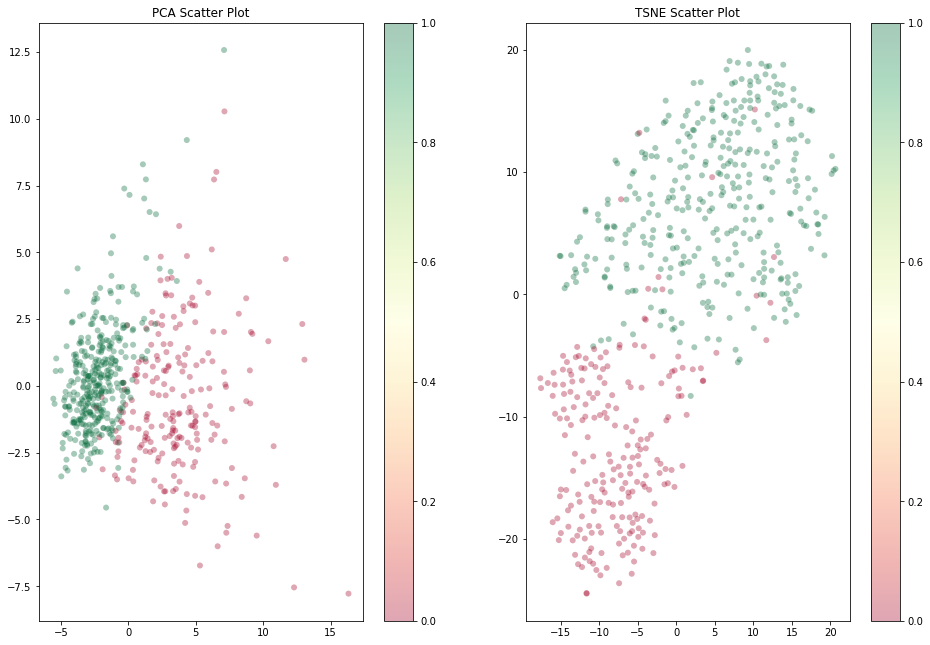

In [10]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:,0],tsne_results_std[:,1],  c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

PCA와 t-SNE 모두 경계가 더 명확해졌지만, 전체적으로 t-SNE 분포가 더욱 더 두 범주 사이의 경계가 명확한 것을 볼 수 있습니다. 